Identificando características dos melhores cursos.

In [35]:
import api
import pandas as pd 

cursos = api.pegar_cursos()
cursos_com_detalhe = await api.pegar_detalhes(cursos)
cursos_pd = pd.json_normalize(cursos_com_detalhe)
cursos_pd = cursos_pd[
    [
        "id",
        "nome",
        "categoria.nome",
        "subcategoria.nome",
        "quantidade_alunos",
        "alunos_ativos.total",
        "nota_disponivel",
        "nota",
        "quantidade_avaliacoes",
        "quantidade_aulas",
        "minutos_video",
        "carga_horaria",
        "quantidade_atividades",
        "publico_alvo",
        "carreiras",
        "musicas",
        "data_criacao",
        
    ]
]
cursos_pd = cursos_pd.rename(
    columns={
        "categoria.nome": "nome_categoria",
        "subcategoria.nome": "nome_subcategoria",
        "alunos_ativos.total": "alunos_ativos_total",
    },
)
cursos_pd = cursos_pd.query("nota_disponivel")

In [36]:
cursos_pd.head(5)

,id,nome,nome_categoria,nome_subcategoria,quantidade_alunos,alunos_ativos_total,nota_disponivel,nota,quantidade_avaliacoes,quantidade_aulas,minutos_video,carga_horaria,quantidade_atividades,publico_alvo,carreiras,musicas,data_criacao
0,2974,.NET 6 e Identity: implementando controle de u...,Programação,.NET,655,427.0,True,9.3,307,5,131,8,45,"Qualquer pessoa com conhecimento em C#, banco ...",[],[],2023-04-18
1,2792,.NET 6: criando uma web API,Programação,.NET,3372,1073.0,True,9.4,1487,6,170,10,55,Profissionais que já atuam no desenvolvimento ...,[],[],2022-12-01
2,2876,.NET 6: relacionando entidades,Programação,.NET,1144,398.0,True,9.2,579,5,125,8,44,Qualquer pessoa com conhecimento em C# e na cr...,[],[],2023-02-03
3,1091,A Empresa Ágil: introduzindo o Business Agilit...,Inovação & Gestão,Transformação Ágil,42761,2102.0,True,9.3,36966,6,80,6,31,Estudantes que buscam qualificação profissiona...,[],[],2019-05-02
4,805,Acessibilidade web parte 1: tornando seu front...,Front-end,HTML e CSS,22313,1197.0,True,9.2,11799,5,154,6,50,Pessoas com conhecimentos básicos em HTML e CS...,[],[],2018-04-19


In [43]:
cursos_pd["idade_curso"] = (
    pd.Timestamp("now") - pd.to_datetime(cursos_pd["data_criacao"])
).dt.days
cursos_pd = cursos_pd.query("quantidade_avaliacoes > 0.6 * quantidade_alunos")
cursos_pd[
    [
        "nota",
        "quantidade_avaliacoes",
        "quantidade_alunos",
        "carga_horaria",
        "quantidade_atividades",
        "minutos_video",
        "idade_curso",
        "alunos_ativos_total",
    ]
].corr()["nota"]

nota                     1.000000
quantidade_avaliacoes    0.036838
quantidade_alunos        0.029011
carga_horaria            0.148820
quantidade_atividades    0.106283
minutos_video            0.117377
idade_curso             -0.040553
alunos_ativos_total      0.052590
Name: nota, dtype: float64

In [47]:
cursos_pd["nota_cut"] = pd.cut(x=cursos_pd["nota"], bins = 3, labels = ["baixa", "media", "alta"])
cursos_pd[["nota_cut", "nota"]].drop_duplicates().sort_values("nota")

,nota_cut,nota
711,baixa,8.4
720,baixa,8.6
621,baixa,8.7
813,baixa,8.8
305,media,8.9
96,media,9.0
5,media,9.1
59,media,9.2
3,alta,9.3
127,alta,9.4


In [52]:
tab = pd.crosstab(cursos_pd["nome_categoria"], cursos_pd["nota_cut"])
tab

nota_cut,baixa,media,alta
nome_categoria,,,
Data Science,2,23,23
DevOps,1,17,26
Front-end,4,10,18
Inovação & Gestão,1,69,96
Mobile,0,9,11
Programação,0,24,46
UX & Design,1,8,12


In [51]:
import scipy.stats as stats
stats.chi2_contingency(tab)

Chi2ContingencyResult(statistic=24.222991450629234, pvalue=0.018965809065082814, dof=12, expected_freq=array([[ 1.07730673, 19.1521197 , 27.77057357],
       [ 0.98753117, 17.55610973, 25.4563591 ],
       [ 0.71820449, 12.7680798 , 18.51371571],
       [ 3.72568579, 66.23441397, 96.03990025],
       [ 0.44887781,  7.98004988, 11.57107232],
       [ 1.57107232, 27.93017456, 40.49875312],
       [ 0.4713217 ,  8.37905237, 12.14962594]]))

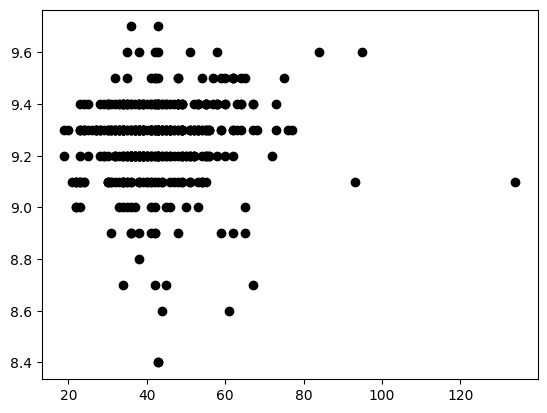

In [39]:
import matplotlib.pyplot as plt

coluna = ["quantidade_atividades"]

# Plot outputs
plt.scatter(cursos_pd[coluna], cursos_pd[["nota"]], color="black")

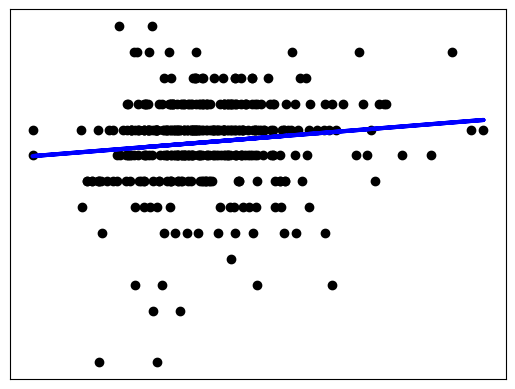

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


reg = linear_model.LinearRegression()

coluna = ["minutos_video"]

reg.fit(cursos_pd[coluna], cursos_pd[["nota"]])

nota_pred = reg.predict(cursos_pd[coluna])

# Plot outputs
plt.scatter(cursos_pd[coluna], cursos_pd[["nota"]], color="black")
plt.plot(cursos_pd[coluna], nota_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
mean_squared_error(cursos_pd[["nota"]], nota_pred)
r2_score(cursos_pd[["nota"]], nota_pred)

plt.show()